In [10]:
pip install opencv-python-headless

   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.4 MB 6.3 MB/s eta 0:00:07
   -- ------------------------------------- 2.6/39.4 MB 7.5 MB/s eta 0:00:05
   --- ------------------------------------ 3.9/39.4 MB 7.3 MB/s eta 0:00:05
   ----- ---------------------------------- 5.5/39.4 MB 7.0 MB/s eta 0:00:05
   ------- -------------------------------- 7.3/39.4 MB 7.2 MB/s eta 0:00:05
   -------- ------------------------------- 8.7/39.4 MB 7.1 MB/s eta 0:00:05
   ---------- ----------------------------- 10.2/39.4 MB 7.1 MB/s eta 0:00:05
   ------------ --------------------------- 12.1/39.4 MB 7.2 MB/s eta 0:00:04
   ------------- -------------------------- 13.4/39.4 MB 7.2 MB/s eta 0:00:04
   --------------- ------------------------ 15.2/39.4 MB 7.2 MB/s eta 0:00:04
   ----------------- ---------------------- 16.8/39.4 MB 7.2 MB/s eta 0:00:04
   ------------------ --------------------- 18.4/39.4 MB 7.3 MB/s eta 0:00:03


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\PC\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import cv2
print(cv2.__version__)

4.11.0


In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar una imagen en modo BGR
img = cv2.imread('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 4/9996354373img.jpg')

In [13]:
img.shape

(500, 406, 3)

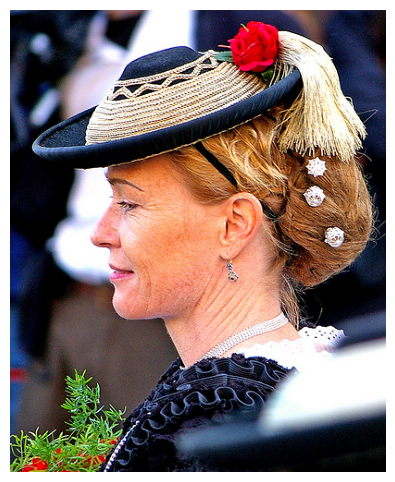

In [19]:
# Convertir de BGR a RGB para mostrar correctamente con Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
plt.imshow(img_rgb)  # Mostrar en formato RGB
plt.axis('off')  # Ocultar ejes
plt.show()

In [14]:
img

array([[[134,  86,  68],
        [125,  75,  55],
        [124,  72,  55],
        ...,
        [ 39,  27,  47],
        [ 29,  19,  35],
        [ 28,  24,  29]],

       [[110,  62,  56],
        [113,  64,  50],
        [101,  61,  33],
        ...,
        [ 26,  31,  40],
        [ 17,  20,  34],
        [ 26,  20,  21]],

       [[103,  54,  40],
        [ 91,  45,  34],
        [104,  54,  34],
        ...,
        [ 24,  23,  33],
        [ 30,  25,  46],
        [ 25,  22,  38]],

       ...,

       [[ 85, 163, 116],
        [ 47, 182, 126],
        [ 76, 127,  99],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 89, 189, 141],
        [ 69, 180, 130],
        [ 86, 133, 100],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 92, 196, 143],
        [ 82, 159, 102],
        [ 64, 120,  69],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [20]:
# Separar los canales de color
B, G, R = cv2.split(img)
R

array([[ 68,  55,  55, ...,  47,  35,  29],
       [ 56,  50,  33, ...,  40,  34,  21],
       [ 40,  34,  34, ...,  33,  46,  38],
       ...,
       [116, 126,  99, ...,   0,   0,   0],
       [141, 130, 100, ...,   0,   0,   0],
       [143, 102,  69, ...,   0,   0,   0]], dtype=uint8)

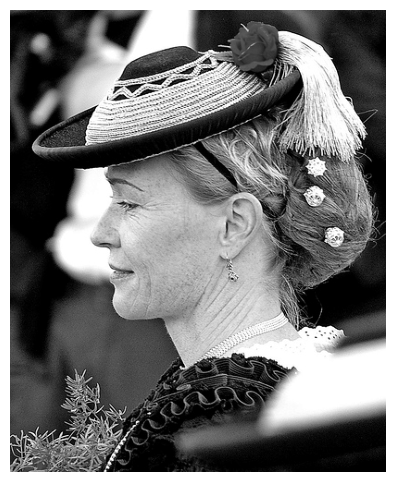

In [25]:
# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Oscurecer la imagen dividiéndola por un valor alto (ajustable)
dark_image = (gray / 2).astype(np.uint8)

# Mostrar la imagen oscurecida
plt.figure(figsize=(8, 6))
plt.imshow(dark_image, cmap='gray')
plt.axis('off')
plt.show()


In [21]:
R.shape

(500, 406)

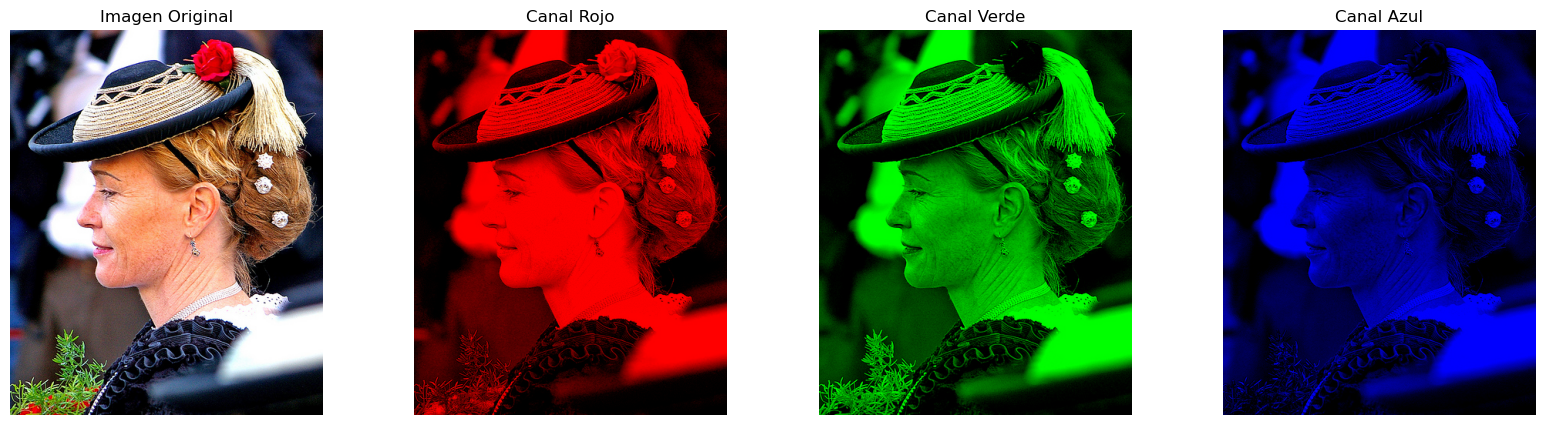

In [23]:
# Crear una imagen en negro con el mismo tamaño
zeros = np.zeros(img.shape[:2], dtype="uint8")

# Crear imágenes para cada canal de color
img_red = cv2.merge([R, zeros, zeros])
img_green = cv2.merge([zeros, G, zeros])
img_blue = cv2.merge([zeros, zeros, B])

# Visualizar los canales individuales y la imagen original
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Convertir BGR a RGB para matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Imagen original
axes[0].imshow(img_rgb)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Canal Rojo
axes[1].imshow(img_red)
axes[1].set_title('Canal Rojo')
axes[1].axis('off')

# Canal Verde
axes[2].imshow(img_green)
axes[2].set_title('Canal Verde')
axes[2].axis('off')

# Canal Azul
axes[3].imshow(img_blue)
axes[3].set_title('Canal Azul')
axes[3].axis('off')

plt.show()

In [26]:
img_green.min(axis=0)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [28]:
img_bluegreen =img_blue + img_green

In [30]:
    # Extraer los canales BGR
    blue, green, red = cv2.split(img)  # Separa los canales

    # Mostrar solo el canal azul
    plt.figure(figsize=(6, 6))  # Ajustar el tamaño de la figura
    plt.imshow(blue, cmap='Blues')  # Usar colormap azul
    plt.title('Canal Azul')  # Título de la imagen
    plt.axis('off')  # Ocultar ejes
    plt.show()

NameError: name 'imshow' is not defined